## Title: Student Performance Based On Study Behaviors

Tony Fu, Hao Jiang, Aimee Garcia Castro

## Introduction:
From the paper of Developing intuitive knowledge classifier and modeling of users' domain-dependent data in web, we can see one of the most powerful technologies for adaptable applications is web-based user modeling. Students' data is used by researchers to personalize topics based on their understanding. The user modeling system's purpose is to ensure that pupils have sufficient or suitable knowledge. (Kahraman et al., 2013)
 
Based on the dataset of the students' knowledge status about the subject of Electrical DC Machines, we can find many elements play a role in how well a student will perform on a test. Some elements include time spent studying for main topics, how much repetition is in their studying, and also time spent studying related, but not main topics. For this project, we want to try to predict the knowledge level of a student based on their study behavior.
 
Our predictive question that we will try to answer is: “Can we predict the UNS of a student based on factors such as STG, SCG, and STR?”
 
Our data set is a data set on students’ knowledge status regarding the subject of Electrical DC machines. It looks at **STG** (the degree of study time for goal object materials), **SCG** (the degree of repetition number of user for goal object materials), **STR** (the degree of study time of user for related objects with goal object), **LPR** (the exam performance of user for related object with goal object), and **PEG** (the exam performance of user for goal objects). As well, it relates PEG to **UNS** (the knowledge level of the user). 


## Preliminary exploratory data analysis:


In [1]:
library(dplyr)
library(tidyverse)
library(repr)
library(rvest)
library(stringr)
library(readxl)
library(ggplot2)
library(tidymodels)
library(GGally)
options(repr.matrix.max.rows = 6)
source("tests.R")
source("cleanup.R")

Warning message:
“package ‘dplyr’ was built under R version 4.0.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ stringr 1.4.0
✔ tidyr   1.1.2     ✔ forcats 0.5.0
✔ readr   1.3.1     

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘rvest’ was built under R version 4.0.2”
Loading required package: xml2


Attaching package: ‘rvest’


The following object is mask

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [2]:
user_knowledge <- read_excel("data/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls", sheet = 2) %>%
    select(STG, SCG, STR, LPR, PEG, UNS) %>%
        mutate(UNS = recode(UNS, High = 'high', Middle = 'middle', Low = 'low'))

user_knowledge

New names:
* `` -> ...7
* `` -> ...8



STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,high
0.06,0.06,0.05,0.25,0.33,low
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,high
0.50,0.75,0.81,0.61,0.26,middle
0.66,0.90,0.76,0.87,0.74,high


In [3]:
sum(is.na(user_knowledge)) # checks for any missing values in the data frame

[1] 0

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



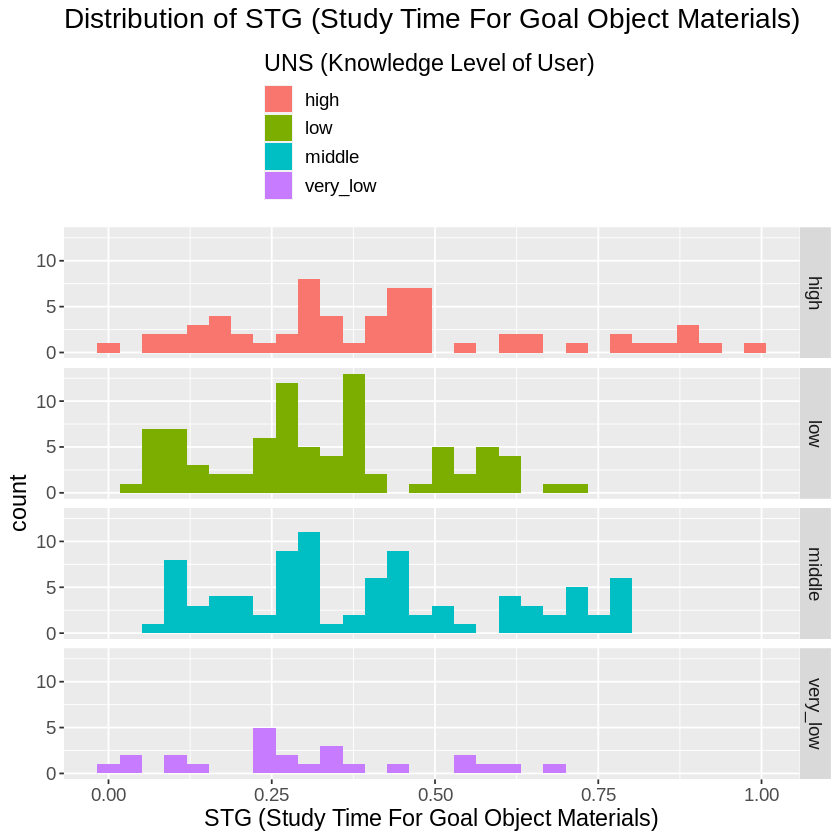

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



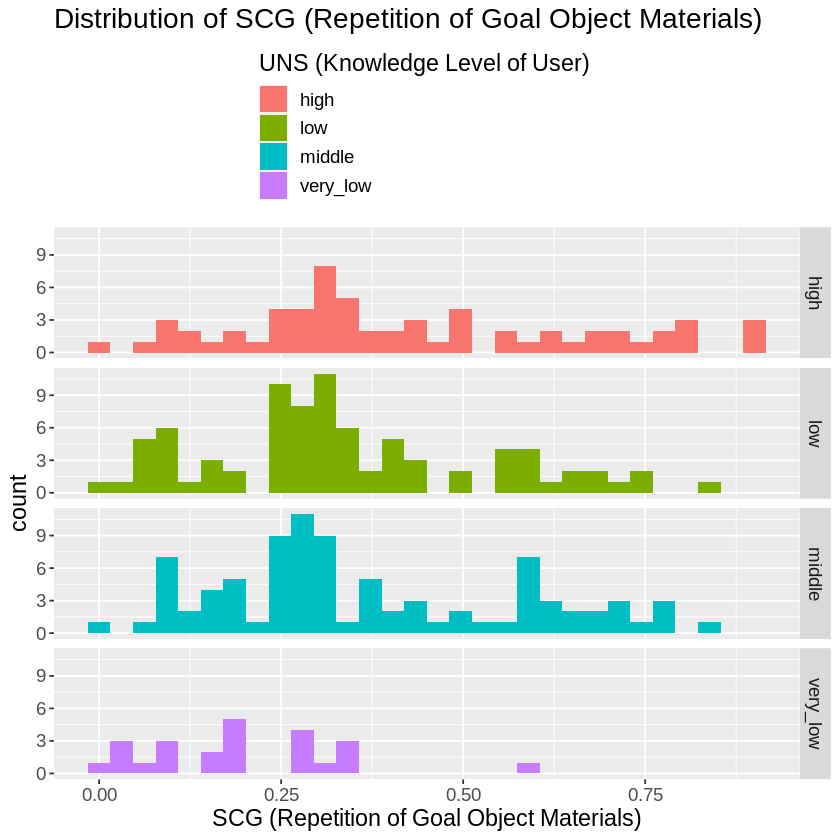

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



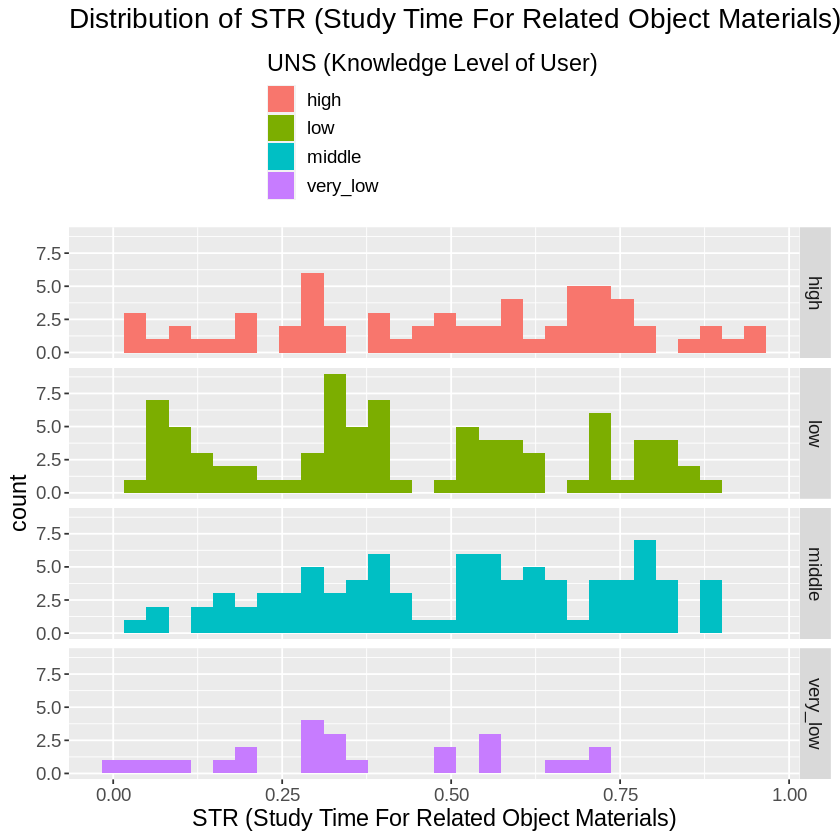

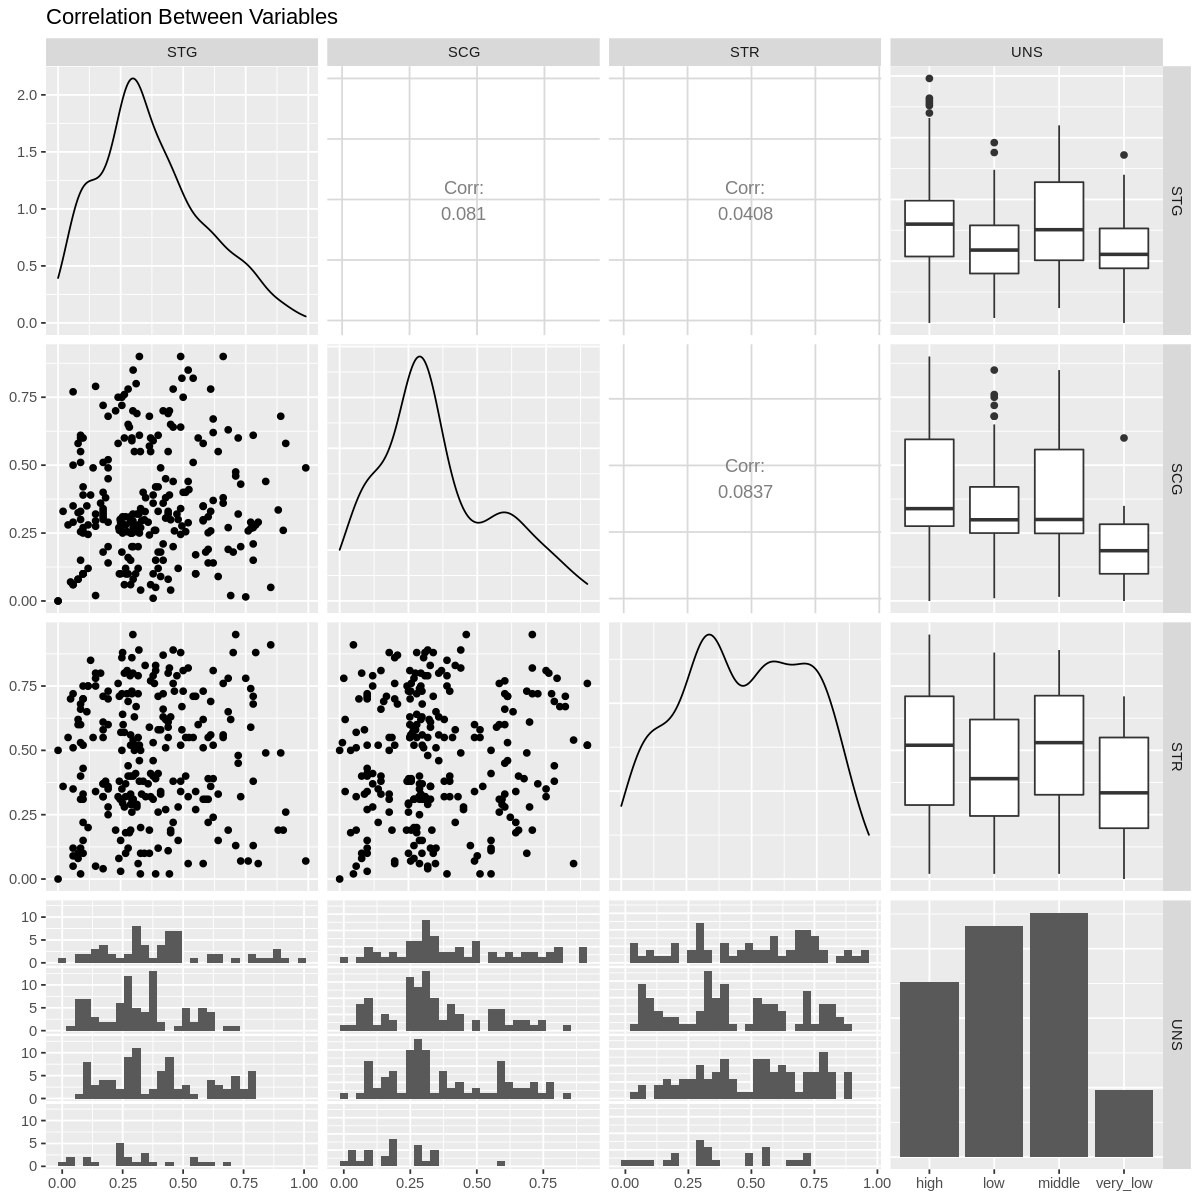

In [4]:
user_knowledge_plot <- ggplot(user_knowledge, aes(x = STG, fill = UNS)) +
    geom_histogram() +
    facet_grid(rows = vars(UNS)) +
    labs(x = "STG (Study Time For Goal Object Materials)", fill = "UNS (Knowledge Level of User)") +
    ggtitle("Distribution of STG (Study Time For Goal Object Materials)") + 
    theme(text = element_text(size = 14), 
    legend.position = "top",
        legend.direction = "vertical")

user_knowledge_plot

user_knowledge_plot_2 <- ggplot(user_knowledge, aes(x = SCG, fill = UNS)) +
    geom_histogram() +
    facet_grid(rows = vars(UNS)) +
    labs(x = "SCG (Repetition of Goal Object Materials)", fill = "UNS (Knowledge Level of User)") +
    ggtitle("Distribution of SCG (Repetition of Goal Object Materials)") + 
    theme(text = element_text(size = 14), 
    legend.position = "top",
        legend.direction = "vertical")

user_knowledge_plot_2

user_knowledge_plot_3 <- ggplot(user_knowledge, aes(x = STR, fill = UNS)) +
    geom_histogram() +
    facet_grid(rows = vars(UNS)) +
    labs(x = "STR (Study Time For Related Object Materials)", fill = "UNS (Knowledge Level of User)") +
    ggtitle("Distribution of STR (Study Time For Related Object Materials)") + 
    theme(text = element_text(size = 14), 
    legend.position = "top",
        legend.direction = "vertical")

user_knowledge_plot_3


user_knowledge_2 <- user_knowledge %>%
    select(-LPR, -PEG,) 

options(repr.plot.width = 10, repr.plot.height = 10)
corr_plot <- ggpairs(user_knowledge_2) +
    ggtitle("Correlation Between Variables")
corr_plot

Since we want to predict a student's UNS which is a categorical variable, we need to factor it on our dataset and use the KNN classification method.

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,high
0.06,0.06,0.05,0.25,0.33,low
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,high
0.50,0.75,0.81,0.61,0.26,middle
0.66,0.90,0.76,0.87,0.74,high


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.3446491,10,0.03472041,Model01
6,accuracy,multiclass,0.3757519,10,0.02694831,Model02
11,accuracy,multiclass,0.3469674,10,0.03423076,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
86,accuracy,multiclass,0.3451504,10,0.02733522,Model18
91,accuracy,multiclass,0.3604386,10,0.02806300,Model19
96,accuracy,multiclass,0.3611779,10,0.02964452,Model20


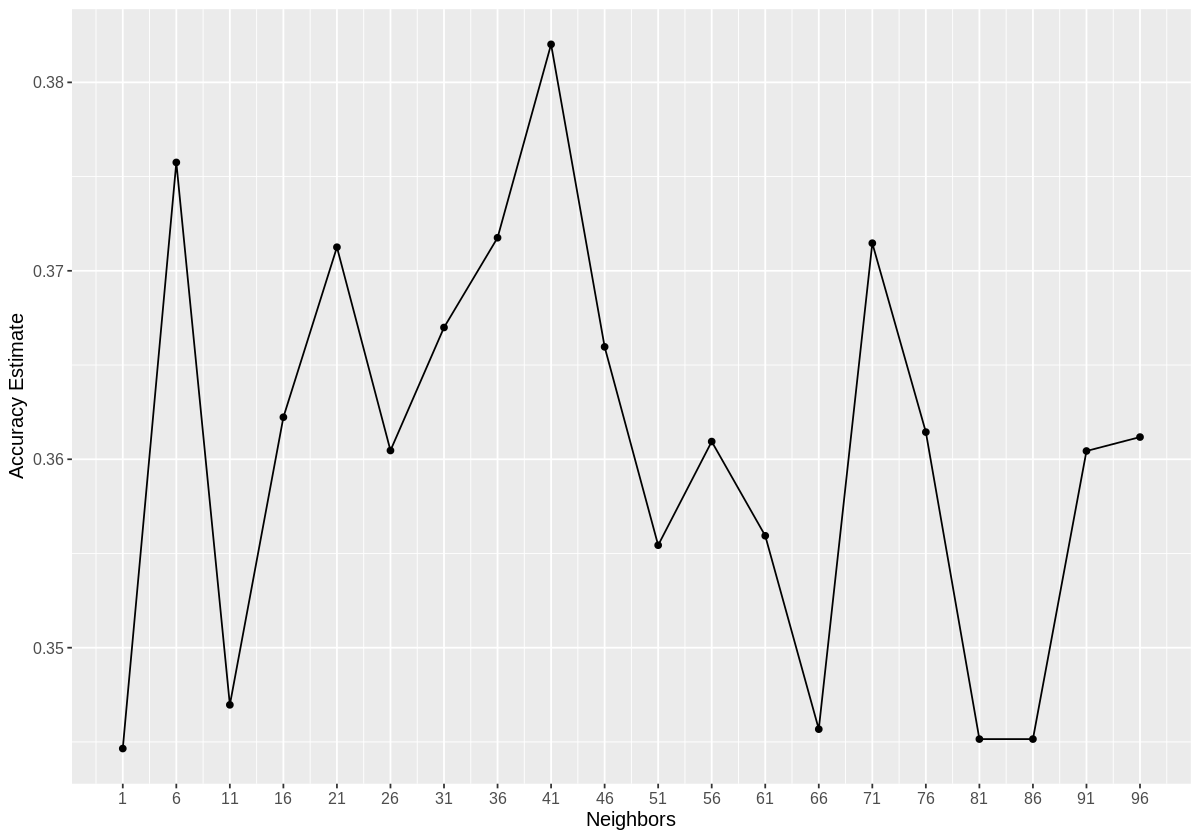

In [25]:
set.seed(9999)
user_knowledge <- user_knowledge %>%
                  mutate(UNS = as_factor(UNS))
user_knowledge

user_knowledge_split <- initial_split(user_knowledge, prop = 0.75, strata = UNS)  
user_knowledge_train <- training(user_knowledge_split)   
user_knowledge_test <- testing(user_knowledge_split)

user_knowledge_vfold <- vfold_cv(user_knowledge_train, v = 10, strata = UNS)
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
            set_engine("kknn") %>%
            set_mode("classification")

user_knowledge_recipe <- recipe(UNS ~ STG + SCG +STR, data = user_knowledge_train) %>%
                       step_scale(all_predictors()) %>%
                       step_center(all_predictors())

user_knowledge_results <- workflow() %>%
                      add_recipe(user_knowledge_recipe) %>%
                      add_model(knn_tune) %>%
                      tune_grid(resamples = user_knowledge_vfold, grid = k_vals) %>%
                      collect_metrics()%>% 
                      filter(.metric == "accuracy") 
user_knowledge_results

options(repr.plot.width = 10, repr.plot.height = 7)
accuracy_versus_k <- ggplot(user_knowledge_results, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate")+
      theme(text = element_text(size = 12))+
      scale_x_continuous(breaks = seq(1, 96, by = 5))
accuracy_versus_k

I will choose the value of k to be 41 which has the highest Accuracy Estimate, is kind of reliable in the presence of uncertainty, and the cost of training the model is not prohibitive()

## Methods: 

To conduct our data analysis, we will look at the relationship between STG, SCG, STR, and UNS. Thus, we will be looking at these four variables (STG, SCG, and STR will be the possible predictors used and UNS will be the categorical class that we are predicting). To determine which predictors we will use, we will look at the correlation between the predictors and UNS. This will help determine our predictors since we can see the distribution of the predictors and make sure each is reliable (e.g. making sure the distributions are not influenced by one data point).

To determine 

We are considering a scatter plot to represent our data when predicting the UNS for new data points. We will be comparing STG and STR on the scatter plot since it seems like they contribute more to the UNS of an individual based on their descriptions. Although, we will still be considering SCG as a predictor since it does seem it has a slight influence on the UNS.

## Expected Outcomes and Significance

We expect that our classification on the user knowledge data set will accurately predict an individual's UNS based on their STG, SCG, and STR. Our classifier should be easy to apply in the real world and should establish relationships between these variants which, depending on their level of interaction, could provide solutions and strategies that benefit users. For instance, students can use it to see how much they should study goal object materials in order to achieve a high grade on an exam since it has been previously established that the exam performance of an individual is related to UNS. As well, the classification can allow teachers to predict how well their students will do given how much time is allocated in class to study for goal object materials. These are examples of the impacts that our classification can have on different people. Some future questions may arise from this project like, can we numerically predict the UNS of a student (like IQ)? Or, can we go further and predict approximately the percentage a student will achieve on a test given their STG, SCG, and STR?

## Reference
Kahraman, H. T., Sagiroglu, S., & Colak, I. (2013). The development of intuitive knowledge classifier and the modeling of domain dependent data.<br> 
&emsp;   *Knowledge-Based Systems, 37*, 283–295.<br>
&emsp;   https://doi.org/10.1016/j.knosys.2012.08.009
